In [2]:
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import pressure_tools
from cmocean import cm

%matplotlib inline

In [41]:
path = '/data/bmoorema/results/pond/strat_cont'
prefix = 'SalishSeaIdeal_1h_20170701_20170706'
runIDs = ['basic', 'ahm50x', 'rough', 'rougher']
maskfile = os.path.join(path, 'SalishSeaPond_basic_S4d', 'mesh_mask.nc')

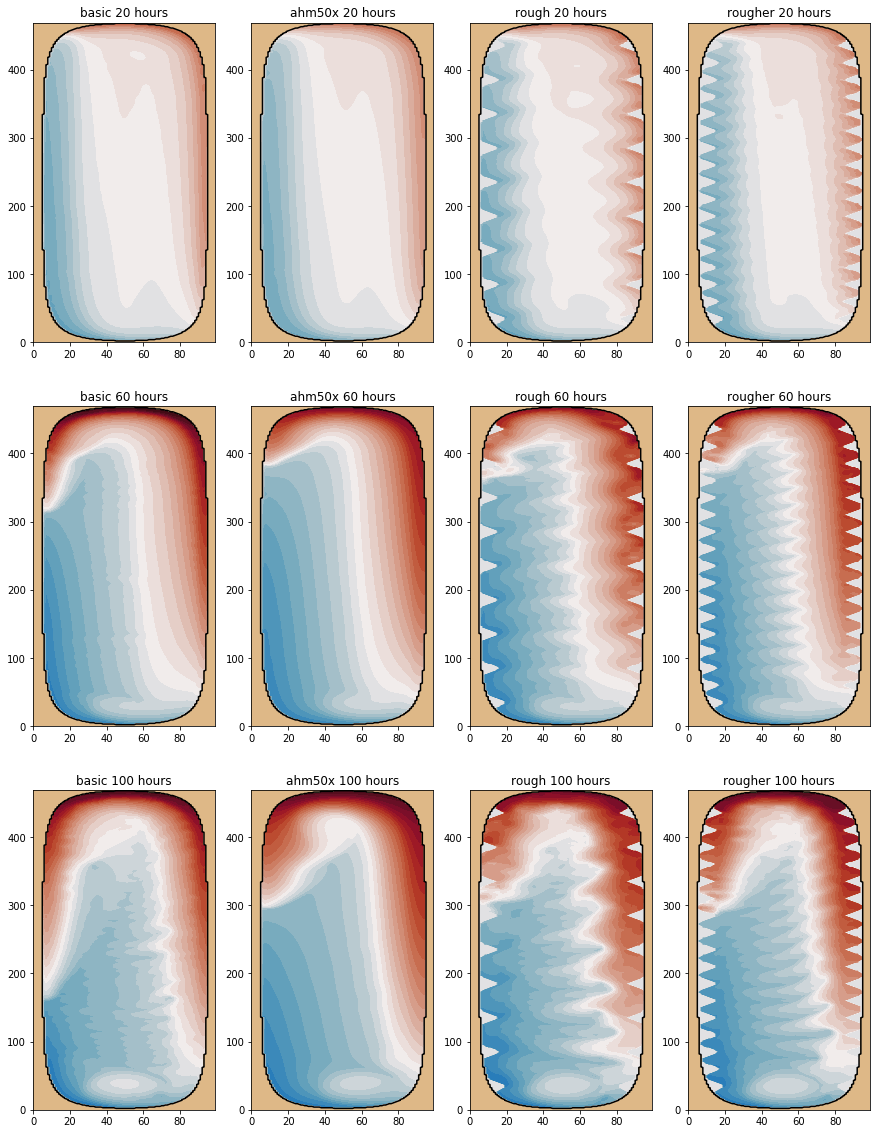

In [42]:
fig, axs = plt.subplots(3, 4, figsize=(15, 20))

for row, t in zip(axs, [20, 60, 100]):
    for ax, runID in zip(row, runIDs):
        params = pressure_tools.load_results(t, os.path.join(path, f'SalishSeaPond_{runID}_S4d'), prefix, maskfile)
        GEO = pressure_tools.calc_geostrophic_velocities(22, params)
        ax.contourf(params['x'], params['y'], params['eta'], levels=np.arange(-0.09, 0.1, 0.005), cmap=cm.balance)
        ax.contourf(params['x'], params['y'], params['tmask'][0, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(params['x'], params['y'], params['tmask'][0, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')

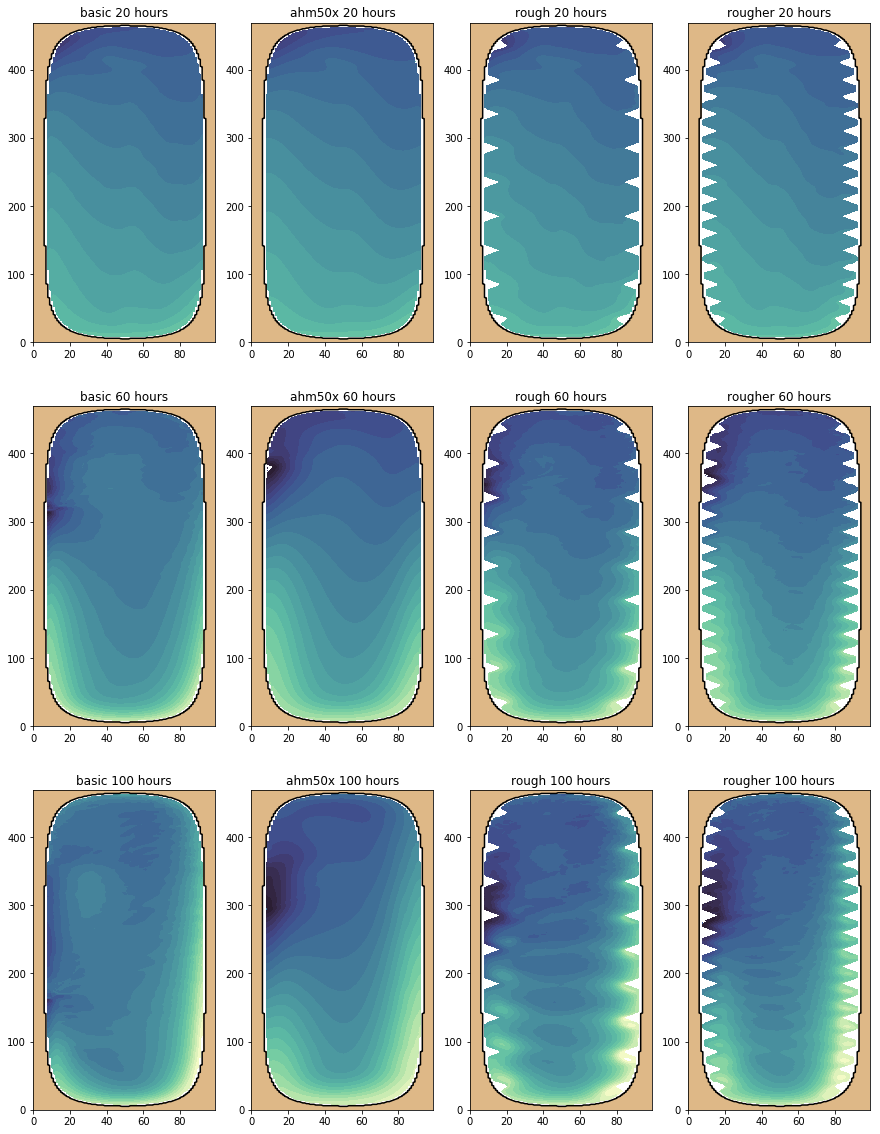

In [43]:
fig, axs = plt.subplots(3, 4, figsize=(15, 20))

for row, t in zip(axs, [20, 60, 100]):
    for ax, runID in zip(row, runIDs):
        params = pressure_tools.load_results(t, os.path.join(path, f'SalishSeaPond_{runID}_S4d'), prefix, maskfile)
        GEO = pressure_tools.calc_geostrophic_velocities(24, params)
        ax.contourf(params['x'], params['y'], GEO['pressure']*1e-4, levels=np.arange(48.98, 49.005, 0.001), cmap=cm.deep)
        ax.contourf(params['x'], params['y'], params['tmask'][22, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(params['x'], params['y'], params['tmask'][22, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')

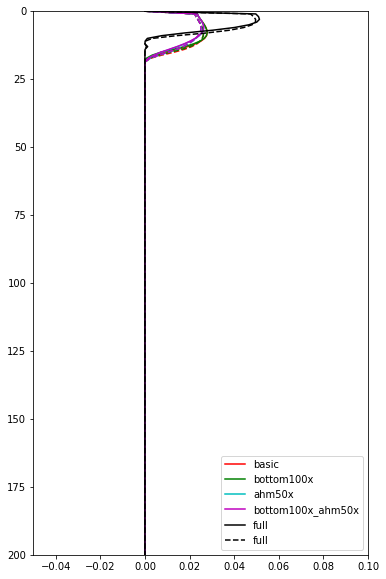

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(6, 10))
ax.set_ylim([200, 0])
ax.set_xlim([-0.05, 0.1])

for runID, color in zip(runIDs, ['r', 'g', 'c', 'm']):
    run = xr.open_dataset(os.path.join(path, f'SalishSeaPond_{runID}_S4d', f'{prefix}_grid_W.nc'))
    run = run.isel(time_counter=100, y=250, x=50)
    ax.plot(run.vert_eddy_diff, run.depthw.values, 'k-', color=color, label=runID)
    ax.plot(run.vert_eddy_visc, run.depthw.values, 'k--', color=color)

SSC = xr.open_dataset('/data/vdo/MEOPAR/completed-runs/candidates/baynessound/apr15lake/SalishSea_1h_20150424_20150429_grid_W.nc')
ax.plot(SSC.vert_eddy_diff[70, :, 570, 170], SSC.depthw.values, 'k-', label='full')
ax.plot(SSC.vert_eddy_visc[70, :, 570, 170], SSC.depthw.values, 'k--', label='full')

ax.legend()
plt.show()

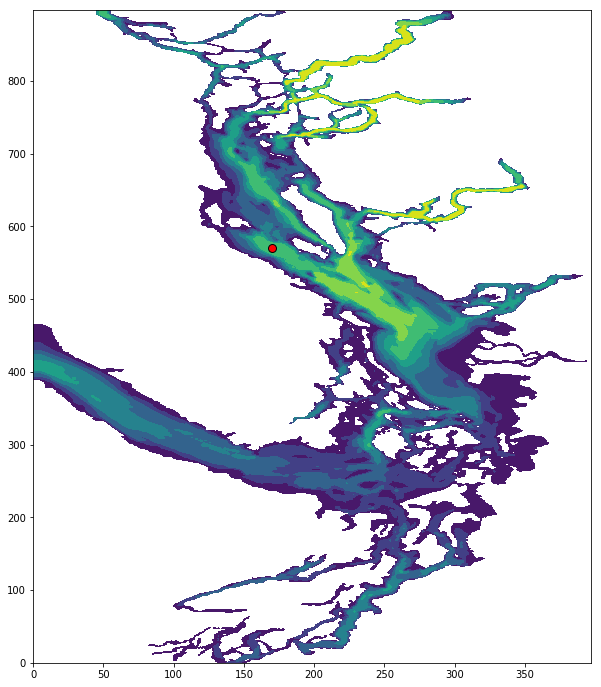

In [33]:
bathy = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc')
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
ax.contourf(bathy.Bathymetry)
ax.plot(170, 570, 'ko', markerfacecolor='r', markersize=8)